In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images.shape

(20030, 512, 512, 1)

In [4]:
images.nbytes

21002977280

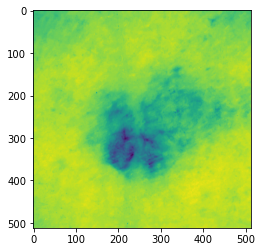

In [5]:
imshow(images[100])

In [6]:
masks.shape

(20030, 512, 512, 1)

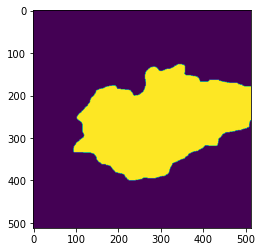

In [7]:
imshow(masks[100])

In [8]:
import sys
sys.path.append('../')
import gp2

In [20]:
C = gp2.KUC_UNet2D(verbose=True)

*** GP2  KUC U-Net2D ***
Working directory: /tmp
Verbose mode active!
{'verbose': True, 'workingdir': '/tmp', 'name': 'kuc_unet2d', 'metric': [<function KUC_Classifier.dice_coeff at 0x7f35b7c8a0d0>], 'loss': <function binary_crossentropy at 0x7f23d29d3670>, 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f2354318d30>, 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7f23dc532220>, 'input_size': (512, 512, 1), 'filter_num': [32, 64, 128, 256, 512, 1024], 'n_labels': 1, 'stack_num_down': 3, 'stack_num_up': 3, 'activation': 'ReLU', 'output_activation': 'Sigmoid', 'batch_norm': True, 'pool': True, 'unpool': True, 'backbone': None, 'weights': 'imagenet', 'freeze_backbone': True, 'freeze_batch_norm': True}
Model summary:
Model: "kuc_unet2d_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     

In [19]:
hist = C.train(images[0:10000], masks[0:10000], images[10000:15000], masks[10000:15000], batch_size=16)

Epoch 1/100
358/625 [================>.............] - ETA: 1:07 - loss: 0.3905 - dice_coeff: 0.3298

KeyboardInterrupt: 

In [25]:
C2 = gp2.UNet(verbose=True)

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_198 (Conv2D)             (None, 512, 512, 16) 160         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_192 (BatchN (None, 512, 512, 16) 64          conv2d_198[0][0]                 
__________________________________________________________________________________________________
activation_192 (Activation)     (None, 512, 512, 16) 0           batch_normalization_192[0][0]    
____________________________________________________________________________________________

In [23]:
images[0:10000].dtype

dtype('float32')

In [22]:
masks[0:10000].dtype

dtype('bool')

In [26]:
hist = C2.train(images[0:10000], masks[0:10000].astype(np.float32), images[10000:15000], masks[10000:15000].astype(np.float32), batch_size=16)

Epoch 1/100
625/625 [==============================] - 151s 230ms/step - loss: 0.7902 - dice_coeff: 0.5393 - val_loss: 0.6077 - val_dice_coeff: 0.6399
Epoch 2/100
 80/625 [==>...........................] - ETA: 1:47 - loss: 0.6200 - dice_coeff: 0.6167

KeyboardInterrupt: 

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [15]:
from runner import Runner
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmp5ra1mf77GP2
Verbose mode active!


In [16]:
R.setup_data(images, masks, dataset_size=10000, weights=weights)


Weights OK!


In [17]:
R.run_classifier()

Epoch 1/100
8/8 [==============================] - 17s 2s/step - loss: 1.3344 - dice_coeff: 0.3202 - val_loss: 1.4489 - val_dice_coeff: 0.2490
Epoch 2/100
8/8 [==============================] - 11s 1s/step - loss: 1.0722 - dice_coeff: 0.4082 - val_loss: 1.4517 - val_dice_coeff: 0.2491
Epoch 3/100
8/8 [==============================] - 11s 1s/step - loss: 0.9740 - dice_coeff: 0.4458 - val_loss: 1.4517 - val_dice_coeff: 0.2491
Epoch 4/100
8/8 [==============================] - 11s 1s/step - loss: 0.9013 - dice_coeff: 0.4789 - val_loss: 1.4493 - val_dice_coeff: 0.2489
Epoch 5/100
8/8 [==============================] - 12s 2s/step - loss: 0.8524 - dice_coeff: 0.5003 - val_loss: 1.4449 - val_dice_coeff: 0.2474
Epoch 6/100
8/8 [==============================] - 12s 2s/step - loss: 0.8502 - dice_coeff: 0.5060 - val_loss: 1.4256 - val_dice_coeff: 0.2444
Epoch 7/100
8/8 [==============================] - 12s 2s/step - loss: 0.7679 - dice_coeff: 0.5414 - val_loss: 1.3946 - val_dice_coeff: 0.2408

KeyboardInterrupt: 